<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.988003,98.167780,86.537253,1.697639,238.390675,235.849346,2.541329
1,0.0,1.0,93.158437,90.221338,75.162029,0.606486,269.148290,267.955408,1.192883
2,0.0,2.0,79.759597,99.265737,69.359339,0.077988,258.462663,257.389977,1.072686
3,0.0,3.0,88.265086,73.518982,86.517586,-4.887998,253.413656,258.347956,-4.934300
4,0.0,4.0,70.207577,87.762997,33.074668,-4.163898,196.881344,199.717077,-2.835733
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.798318,69.647700,73.905345,-0.217260,180.134103,180.831577,-0.697474
59996,999.0,56.0,20.367319,62.562273,80.409755,1.109250,174.448596,174.413623,0.034973
59997,999.0,57.0,34.233418,34.000613,60.463433,-0.926210,137.771253,139.308067,-1.536813
59998,999.0,58.0,77.628032,99.273055,42.663255,-0.178084,229.386257,227.016653,2.369605


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.988003,98.167780,86.537253,1.697639,238.390675,235.849346,2.541329
1,0.0,1.0,93.158437,90.221338,75.162029,0.606486,269.148290,267.955408,1.192883
2,0.0,2.0,79.759597,99.265737,69.359339,0.077988,258.462663,257.389977,1.072686
3,0.0,3.0,88.265086,73.518982,86.517586,-4.887998,253.413656,258.347956,-4.934300
4,0.0,4.0,70.207577,87.762997,33.074668,-4.163898,196.881344,199.717077,-2.835733
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.798318,69.647700,73.905345,-0.217260,180.134103,180.831577,-0.697474
59996,999.0,56.0,20.367319,62.562273,80.409755,1.109250,174.448596,174.413623,0.034973
59997,999.0,57.0,34.233418,34.000613,60.463433,-0.926210,137.771253,139.308067,-1.536813
59998,999.0,58.0,77.628032,99.273055,42.663255,-0.178084,229.386257,227.016653,2.369605


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    41.988003  98.167780  86.537253   1.697639  238.390675   
      1.0    93.158437  90.221338  75.162029   0.606486  269.148290   
      2.0    79.759597  99.265737  69.359339   0.077988  258.462663   
      3.0    88.265086  73.518982  86.517586  -4.887998  253.413656   
      4.0    70.207577  87.762997  33.074668  -4.163898  196.881344   
...                ...        ...        ...        ...         ...   
999.0 55.0   26.798318  69.647700  73.905345  -0.217260  180.134103   
      56.0   20.367319  62.562273  80.409755   1.109250  174.448596   
      57.0   34.233418  34.000613  60.463433  -0.926210  137.771253   
      58.0   77.628032  99.273055  42.663255  -0.178084  229.386257   
      59.0   39.806600  52.750258  67.499466  12.453430  182.509754   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    235.849346   2.541329  
      1.0    267.955408   1.192883  
      2.0    257.389977   1.072686  
      3.0    258.347956  -4.934300  
      4.0    199.717077  -2.835733  
...                 ...        ...  
999.0 55.0   180.831577  -0.697474  
      56.0   174.413623   0.034973  
      57.0   139.308067  -1.536813  
      58.0   227.016653   2.369605  
      59.0   170.460556  12.049198  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    41.988003  98.167780  86.537253   1.697639  238.390675   
      1.0    93.158437  90.221338  75.162029   0.606486  269.148290   
      2.0    79.759597  99.265737  69.359339   0.077988  258.462663   
      3.0    88.265086  73.518982  86.517586  -4.887998  253.413656   
      4.0    70.207577  87.762997  33.074668  -4.163898  196.881344   
...                ...        ...        ...        ...         ...   
999.0 55.0   26.798318  69.647700  73.905345  -0.217260  180.134103   
      56.0   20.367319  62.562273  80.409755   1.109250  174.448596   
      57.0   34.233418  34.000613  60.463433  -0.926210  137.771253   
      58.0   77.628032  99.273055  42.663255  -0.178084  229.386257   
      59.0   39.806600  52.750258  67.499466  12.453430  182.509754   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    235.849346   2.541329  
      1.0    267.955408   1.192883  
      2.0    257.389977   1.072686  
      3.0    258.347956  -4.934300  
      4.0    199.717077  -2.835733  
...                 ...        ...  
999.0 55.0   180.831577  -0.697474  
      56.0   174.413623   0.034973  
      57.0   139.308067  -1.536813  
      58.0   227.016653   2.369605  
      59.0   170.460556  12.049198  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.988003,98.167780,86.537253,1.697639,238.390675,235.849346,2.541329
1,0.0,1.0,93.158437,90.221338,75.162029,0.606486,269.148290,267.955408,1.192883
2,0.0,2.0,79.759597,99.265737,69.359339,0.077988,258.462663,257.389977,1.072686
3,0.0,3.0,88.265086,73.518982,86.517586,-4.887998,253.413656,258.347956,-4.934300
4,0.0,4.0,70.207577,87.762997,33.074668,-4.163898,196.881344,199.717077,-2.835733
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,26.798318,69.647700,73.905345,-0.217260,180.134103,180.831577,-0.697474
59996,999.0,56.0,20.367319,62.562273,80.409755,1.109250,174.448596,174.413623,0.034973
59997,999.0,57.0,34.233418,34.000613,60.463433,-0.926210,137.771253,139.308067,-1.536813
59998,999.0,58.0,77.628032,99.273055,42.663255,-0.178084,229.386257,227.016653,2.369605


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    41.988003  98.167780  86.537253   1.697639  238.390675   
      1.0    93.158437  90.221338  75.162029   0.606486  269.148290   
      2.0    79.759597  99.265737  69.359339   0.077988  258.462663   
      3.0    88.265086  73.518982  86.517586  -4.887998  253.413656   
      4.0    70.207577  87.762997  33.074668  -4.163898  196.881344   
...                ...        ...        ...        ...         ...   
999.0 55.0   26.798318  69.647700  73.905345  -0.217260  180.134103   
      56.0   20.367319  62.562273  80.409755   1.109250  174.448596   
      57.0   34.233418  34.000613  60.463433  -0.926210  137.771253   
      58.0   77.628032  99.273055  42.663255  -0.178084  229.386257   
      59.0   39.806600  52.750258  67.499466  12.453430  182.509754   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    235.849346   2.541329  
      1.0    267.955408   1.192883  
      2.0    257.389977   1.072686  
      3.0    258.347956  -4.934300  
      4.0    199.717077  -2.835733  
...                 ...        ...  
999.0 55.0   180.831577  -0.697474  
      56.0   174.413623   0.034973  
      57.0   139.308067  -1.536813  
      58.0   227.016653   2.369605  
      59.0   170.460556  12.049198  

[60000 rows x 7 columns]

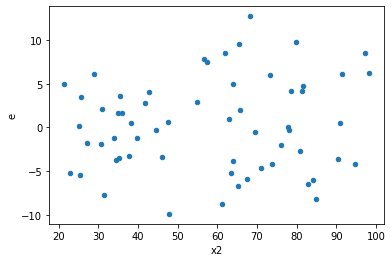

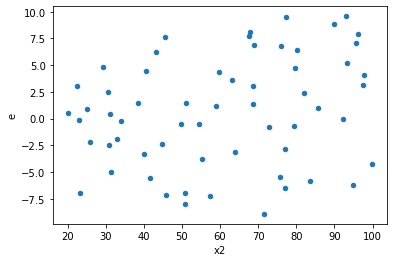

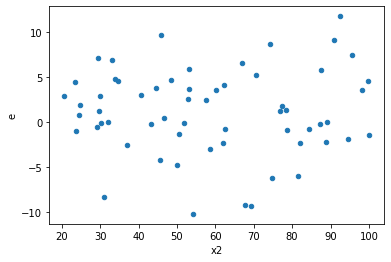

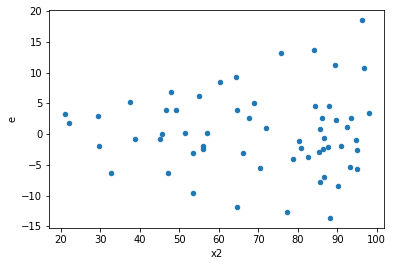

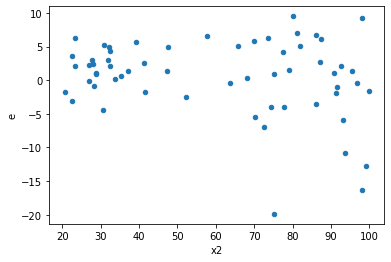

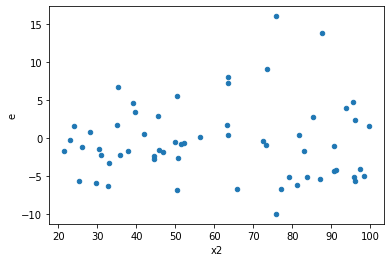

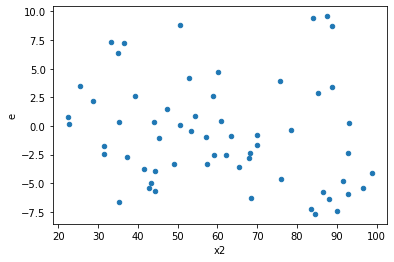

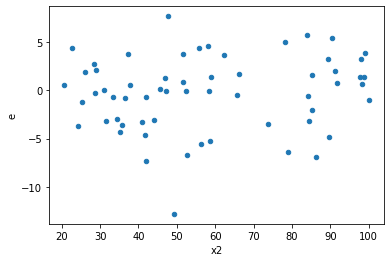

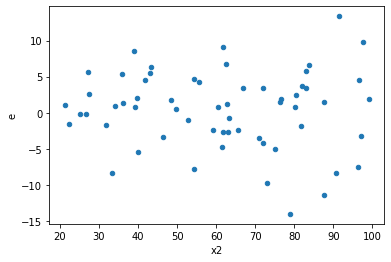

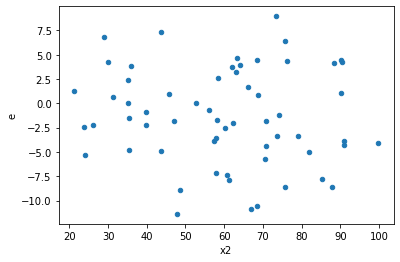

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,300.42521488321205,674.9774270132862,14.305962613486289,32.14178223872791,2.2467402653791173,0.07045624500193237,0.9647718774990338,0.035228122500966186,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,644.6398984457264,845.7575427334488,30.69713802122507,40.2741687015928,1.311984481215996,0.5392887000028876,0.7303556499985562,0.2696443500014438,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,357.007124311953,530.2569678841444,17.000339252950145,25.250331804006876,1.485283995119396,0.3719298387356351,0.8140350806321824,0.18596491936781756,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,420.14195478893595,675.4165420735607,20.006759751854094,32.16269247969336,1.6075912780785373,0.2846338207690935,0.8576830896154533,0.14231691038454675,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,240.02760090714855,399.52753522126665,11.429885757483264,19.025120724822223,1.6645066388669965,0.2511376450857592,0.8744311774571204,0.1255688225428796,Reject005=1 : Homoscedasticity
11.0,21.0,21.0,388.4356181396785,763.5589884093993,18.496934197127548,36.35995182901901,1.965728560285708,0.12945631116642287,0.9352718444167886,0.06472815558321143,Reject005=1 : Homoscedasticity
12.0,21.0,21.0,286.3092451372585,650.5598976799814,13.63377357796469,30.979042746665783,2.2722280496674108,0.06672515502555965,0.9666374224872202,0.03336257751277982,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,725.7111288053111,915.7193767475355,34.55767280025291,43.6056846070255,1.261823527847812,0.5989095496568884,0.7005452251715558,0.2994547748284442,Reject005=1 : Homoscedasticity
14.0,21.0,21.0,312.53391428505734,1084.2879183154107,14.882567346907493,51.632758015019554,3.4693448254913175,0.00625855389968244,0.9968707230501588,0.00312927694984122,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,300.42521488321205,674.9774270132862,14.305962613486289,32.14178223872791,2.2467402653791173,0.07045624500193237,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,644.6398984457264,845.7575427334488,30.69713802122507,40.2741687015928,1.311984481215996,0.5392887000028876,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,357.007124311953,530.2569678841444,17.000339252950145,25.250331804006876,1.485283995119396,0.3719298387356351,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,495.7015714709594,271.20998414933496,23.60483673671235,12.914761149968331,0.5471235109151228,0.1752685362103093,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,518.4106605586416,508.8438364045088,24.68622193136388,24.23065887640518,0.9815458575951669,0.9663603122637384,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,420.14195478893595,675.4165420735607,20.006759751854094,32.16269247969336,1.6075912780785373,0.2846338207690935,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,450.62303108334345,379.1812744916388,21.458239575397307,18.056251166268517,0.8414600416229251,0.6960954649043719,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,240.02760090714855,399.52753522126665,11.429885757483264,19.025120724822223,1.6645066388669965,0.2511376450857592,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,597.5462757888321,344.00977354183215,28.454584561372958,16.381417787706294,0.5757039872563817,0.21405872521331262,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      867
Reject005=0 : Heteroscedasticity    133
Name: Result_test, dtype: int64